In [8]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import re
import shapely
import shapely.plotting

In [2]:

#You'll need to download the geopkg version of the Natural Earth dataset:
# https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/physical/50m_physical.zip

land=gpd.read_file('/Volumes/ice1/ben/NaturalEarth/packages/natural_earth_vector.gpkg', layer = 'ne_50m_land')

In [18]:
GL_clip = gpd.read_file('assets/GL_offpointing.kml')
GL_clip.geometry[0]
land_GL = land.clip(GL_clip.geometry[0]).set_crs(4326).to_crs(3857)

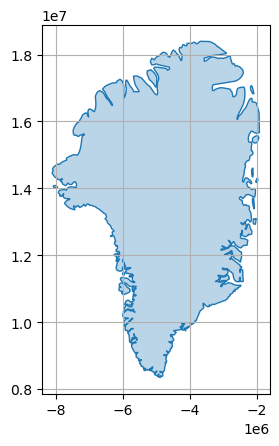

In [19]:
plt.figure()
for geom in land_GL.geometry:
    shapely.plotting.plot_polygon(geom, add_points=False)

In [10]:
land_s=land.cx[:, :-60]

In [11]:
land_s

,scalerank,featurecla,min_zoom,geometry
50,0,Land,1.0,"POLYGON ((-120.55625 -73.75605, -120.37812 -73..."
51,0,Land,1.0,"POLYGON ((-126.32988 -73.28623, -126.06528 -73..."
52,0,Land,2.0,"POLYGON ((-66.17363 -80.07783, -66.26719 -80.0..."
53,0,Land,0.0,"POLYGON ((-57.846 -64.05391, -57.80854 -64.067..."
54,0,Land,2.0,"POLYGON ((-63.18057 -64.46953, -63.27695 -64.5..."
...,...,...,...,...
292,0,Land,3.0,"POLYGON ((-65.84526 -65.84248, -66.06392 -65.8..."
293,0,Land,3.0,"POLYGON ((-66.59531 -66.20068, -66.81865 -66.3..."
294,0,Land,3.0,"POLYGON ((-67.34893 -67.76621, -67.54453 -67.7..."
295,0,Land,3.0,"POLYGON ((-67.3624 -66.89453, -67.40923 -66.90..."


In [12]:
land_s_3857=land_s.to_crs(3857)

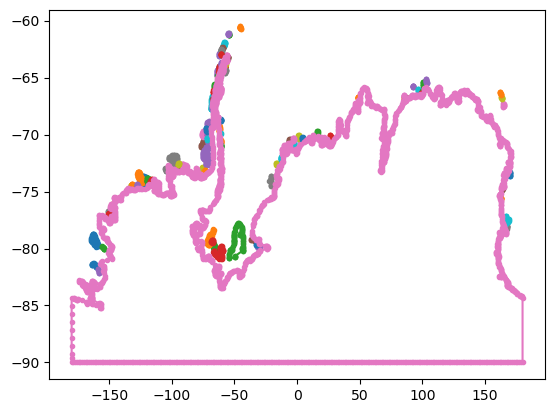

In [13]:
plt.figure()
for jj in land_s.geometry:
    plt.plot(*np.array(jj.exterior.coords).T, marker='.')

In [14]:
land_AA = shapely.unary_union(land_s_3857.geometry)

In [15]:
shelf_AA = shapely.unary_union(gpd.read_file('/Volumes/ice1/ben/NaturalEarth/packages/natural_earth_vector.gpkg', layer = 'ne_50m_antarctic_ice_shelves_polys').to_crs(3857).geometry)

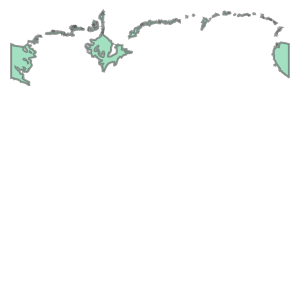

In [16]:
shelf_AA

In [17]:
import pyproj
bds = [np.array([-179.9999, 179.9999]),  np.array([-89, -60])]

to_wm = pyproj.Transformer.from_crs(4326, 3857)
clip_poly = shapely.Polygon(np.c_[to_wm.transform(*np.c_[bds[1][[0, 0, 1, 1, 0]], bds[0][[0, 1, 1, 0, 0]]].T)])

In [23]:

AA=shapely.unary_union([land_AA, shelf_AA]).buffer(1000)

In [24]:
for dist, name in zip([10e3, 50e3, 100e3, 200e3, 500e3, 1000e3], ['10km','50km','100km', '200km', '500km','1000km']):

    AA_buf = AA.buffer(-20000).buffer(20000).buffer(dist).intersection(clip_poly)
    temp=gpd.GeoDataFrame({'name':['Antarctica'], 'geometry':[AA_buf]}).set_crs(3857).to_crs(4326)
    with open(f'assets/Antarctica_{name}.geojson','w') as fh:
        fh.write(temp.to_json())

In [ ]:
! ls assets

In [ ]:
test=gpd.read_file('assets/Antarctica_10km.geojson')

In [20]:
land_GL.buffer(1.e4)

1002    POLYGON ((-5154098.051 8544029.743, -5154555.4...
998     POLYGON ((-4139518.957 9739743.802, -4140529.3...
997     POLYGON ((-5690843.205 10904942.473, -5691702....
131     POLYGON ((-6091538.834 11065870.333, -6104441....
13      POLYGON ((-2821883.75 11326350.793, -2817258.4...
1001    POLYGON ((-5766705.155 11342057.949, -5767890....
999     POLYGON ((-5967828.634 11404226.23, -5968740.5...
1335    POLYGON ((-8016500 14002659.625, -8017466.67 1...
1343    POLYGON ((-7887213.234 13817246.878, -7911976....
1000    POLYGON ((-6131674.916 12013690.395, -6132147....
1341    POLYGON ((-2042993.001 12926691.374, -2077360....
1340    POLYGON ((-2074459.383 13377098.098, -2075184....
1342    POLYGON ((-2020225.901 14169940.716, -2021166....
1339    POLYGON ((-2121612.53 14329686.551, -2122269.1...
1338    POLYGON ((-1999378.585 15350702.69, -1999950.0...
1337    POLYGON ((-2080105.398 16816813.928, -2080555....
1336    POLYGON ((-5011552.326 17012357.7, -5012387.46...
dtype: geometr

In [29]:
for dist, name in zip([10e3, 50e3, 100e3, 200e3, 500e3, 1000e3], ['10km','50km','100km', '200km', '500km','1000km']):

    AA_buf = AA.buffer(-20000).buffer(20000).buffer(dist).intersection(clip_poly)
    GL_buf = land_GL.buffer(dist)
    geom_dict ={'name':['Greenland','Antarctica'],
                'geometry':[AA_buf, shapely.MultiPolygon(GL_buf.geometry)]}
    temp=gpd.GeoDataFrame(geom_dict).set_crs(3857).to_crs(4326)
    with open(f'assets/Antarctica_Greenland_{name}.geojson','w') as fh:
        fh.write(temp.to_json())

In [30]:
temp

,name,geometry
0,Greenland,"POLYGON ((-179.63711 -75.85158, -179.61978 -75..."
1,Antarctica,"MULTIPOLYGON (((-50.60326 56.53686, -50.75835 ..."


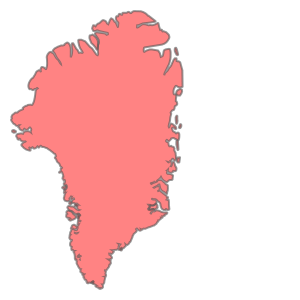